# Predicting Heart Disease using Artificial Neural Network

This notebook looks into using various Python-bases DL and data science libraries in an attempt to buuild a DL model capable of prediction whether or not someone has heart disese based on their medical attributes.

We're going to take the following approach:

Problem defination
Data
Evaluation
Features
Modelling
Experimentation

# 1. Problem Defination

Given a clinical parameters about the patient, can we predict whether or not they have heart disease?

# 2. Data

The original data came from different hospitals of Cuba

# 3. Evaluation

If we can reach good accuracy at predicting whether or not a patient has heart disese during the proof of concept, we'll pursue the project.The evaluation is done on the basis of Confusion Matrix


In [4]:
# Regular EDA and plotting tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

df = pd.read_csv("../augmented_data_version_2.0.csv") #cleaned_data
df.shape  

(1353, 30)

# Data Exploration

The goal here is to find more about the data and become subject matter expert on the data we are working with.

What question(s) we are trying to solve?
What kind of data do we have and how do we treat differnt types ?
What's missing from the data and how do you deal with it ?
Where are the outliers and why should we care about them ?
How can you add, change or remove features to get more out of your data ?

In [5]:

df


,Unnamed: 0,estado_vital,edad,sexo,peso,hipertension_arterial,diabetes_mellitus,tabaquismo,frecuencia_cardiaca,presion_arterial_sistolica,...,trigliceridos,glicemia,colesterol,escala_grace,dialisis,tiempo_isquemia,scacest,insuficiencia_cardiaca_congestiva,enfermedad_arterias_coronarias,infarto_miocardio_agudo
0,0,0,13,0,85,1,0,0,60,120,...,2.4,7.2,5.6,46,0,340,1,0,1,1
1,1,0,15,0,57,1,1,1,95,120,...,1.8,10.8,4.8,58,0,360,1,0,0,0
2,2,0,19,0,65,1,0,0,67,120,...,0.6,10.2,3.8,34,0,60,1,0,0,0
3,3,0,23,1,70,1,0,0,88,120,...,0.6,4.7,5.4,53,0,.,1,0,0,0
4,4,0,28,1,75,1,0,1,77,160,...,0.9,6.2,2.9,43,0,120,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,1348,0,94,1,65,1,0,1,72,130,...,1.1,5.8,3.3,142,0,240,1,0,0,0
1349,1349,0,94,1,65,1,0,1,72,130,...,1.1,5.8,3.3,142,0,240,1,0,0,0
1350,1350,0,94,0,45,1,0,0,85,120,...,0.9,8.6,3.7,154,0,360,1,0,1,1
1351,1351,1,96,0,65,1,0,0,56,110,...,1.5,18.6,5.0,155,0,760,1,0,0,0


<Axes: >

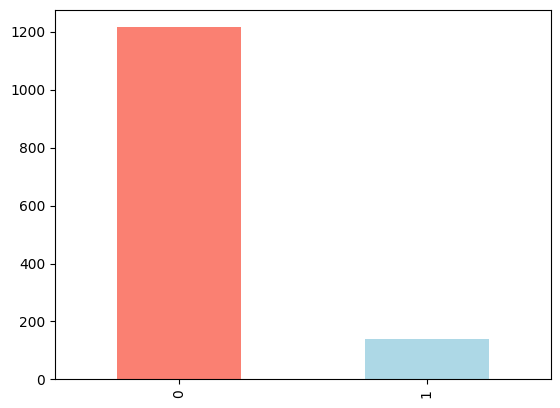

In [6]:
df.estado_vital.value_counts()


# lets visualize the estado_vital variable

df.estado_vital.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [7]:

df.info()

# df.isnull().sum()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         1353 non-null   int64  
 1   estado_vital                       1353 non-null   int64  
 2   edad                               1353 non-null   int64  
 3   sexo                               1353 non-null   int64  
 4   peso                               1353 non-null   int64  
 5   hipertension_arterial              1353 non-null   int64  
 6   diabetes_mellitus                  1353 non-null   int64  
 7   tabaquismo                         1353 non-null   int64  
 8   frecuencia_cardiaca                1353 non-null   int64  
 9   presion_arterial_sistolica         1353 non-null   int64  
 10  presion_arterial_diastolica        1353 non-null   int64  
 11  hb                                 1353 non-null   int64

,Unnamed: 0,estado_vital,edad,sexo,peso,hipertension_arterial,diabetes_mellitus,tabaquismo,frecuencia_cardiaca,presion_arterial_sistolica,...,clopidogrel,trigliceridos,glicemia,colesterol,escala_grace,dialisis,scacest,insuficiencia_cardiaca_congestiva,enfermedad_arterias_coronarias,infarto_miocardio_agudo
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,...,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,676.000000,0.101996,66.220990,0.678492,73.026608,0.849224,0.294900,0.478197,84.853659,125.937177,...,0.961567,1.330968,7.530451,4.781153,109.902439,0.005913,0.876571,0.017738,0.322986,0.103474
std,390.721768,0.302754,12.655743,0.467228,11.982885,0.357963,0.456167,0.499709,14.946676,22.987900,...,0.192311,0.684655,3.480904,1.076720,26.959688,0.076695,0.329051,0.132048,0.467790,0.304689
min,0.000000,0.000000,13.000000,0.000000,40.000000,0.000000,0.000000,0.000000,30.000000,0.000000,...,0.000000,0.000000,3.300000,0.500000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,338.000000,0.000000,57.000000,0.000000,65.000000,1.000000,0.000000,0.000000,78.000000,120.000000,...,1.000000,0.900000,5.400000,4.100000,89.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,676.000000,0.000000,67.000000,1.000000,72.000000,1.000000,0.000000,0.000000,86.000000,130.000000,...,1.000000,1.200000,6.400000,4.900000,110.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1014.000000,0.000000,75.000000,1.000000,80.000000,1.000000,1.000000,1.000000,88.000000,130.000000,...,1.000000,1.500000,8.300000,5.400000,128.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1352.000000,1.000000,98.000000,1.000000,150.000000,1.000000,1.000000,1.000000,180.000000,240.000000,...,1.000000,9.000000,43.000000,10.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.sexo.value_counts() # 1=male, 0=female

1    918
0    435
Name: sexo, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

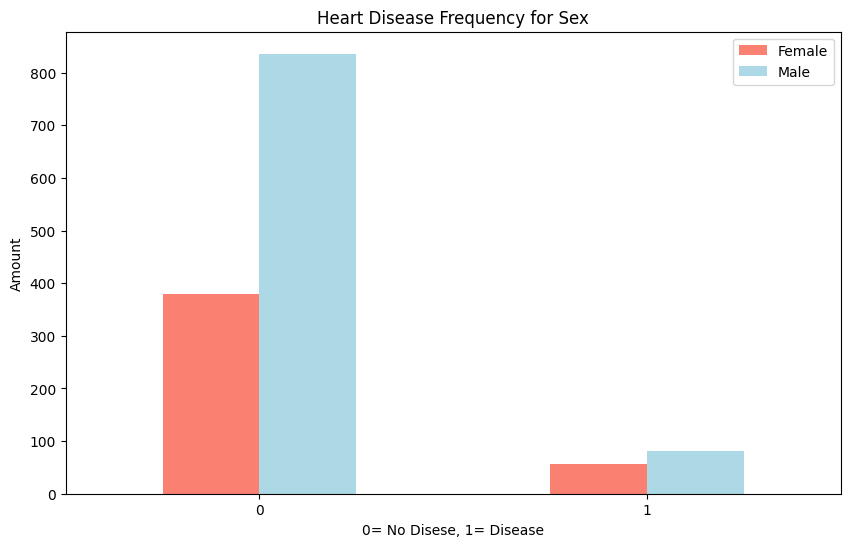

In [9]:
# Compare target column to sex column
pd.crosstab(df.estado_vital, df.sexo)

# lest visualize more
pd.crosstab(df.estado_vital, df.sexo).plot(kind="bar",
                                   figsize=(10,6),
                                   color = ["salmon","lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No Disese, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])

plt.xticks(rotation=0)

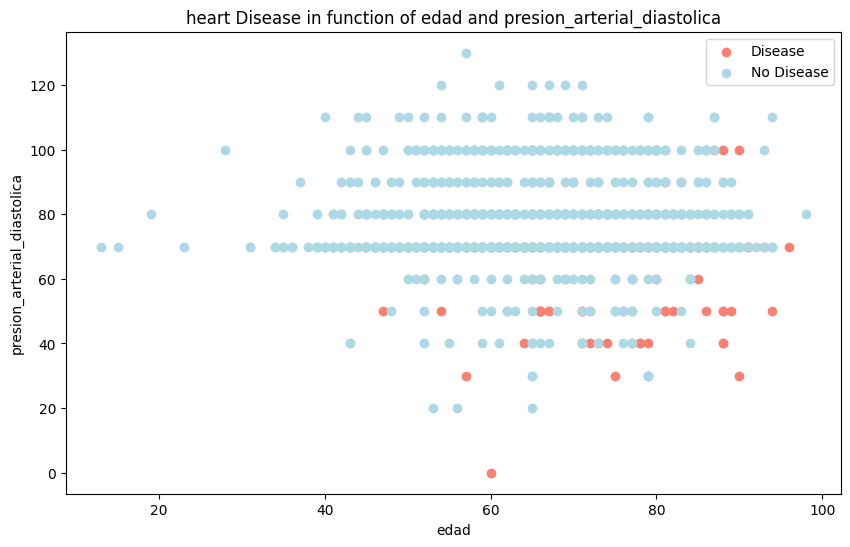

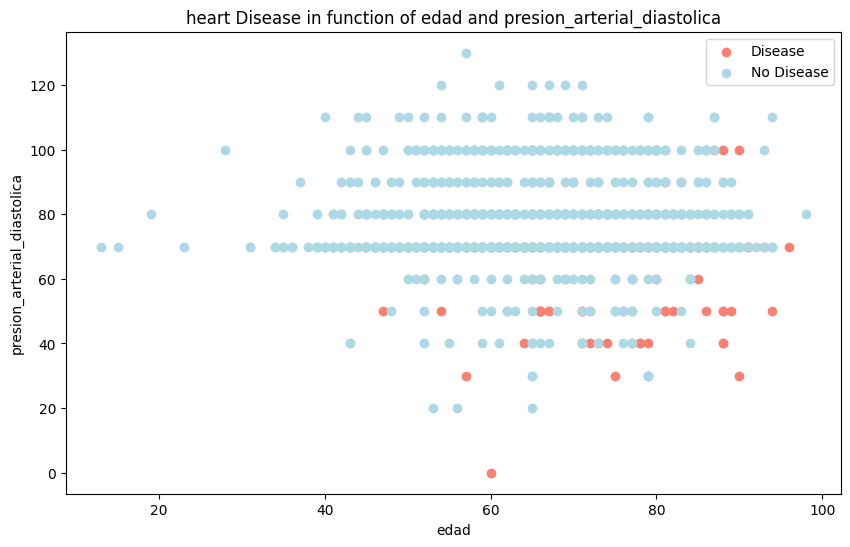

In [10]:
# Age vs max heart rate 
df.presion_arterial_diastolica.value_counts() # thalach=maximum heartrate achieved

# Craete another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.edad[df.estado_vital==1],
           df.presion_arterial_diastolica[df.estado_vital==1],
           c ="salmon")

#Sca tter with negative examples
plt.scatter(df.edad[df.estado_vital==0],
           df.presion_arterial_diastolica[df.estado_vital==0],
           c = "lightblue")

# Add some helpful info
plt.title("heart Disease in function of edad and presion_arterial_diastolica")
plt.xlabel("edad")
plt.ylabel("presion_arterial_diastolica")
plt.legend(["Disease", "No Disease"])

# Craete another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.edad[df.estado_vital==1],
           df.presion_arterial_diastolica[df.estado_vital==1],
           c ="salmon")

#Sca tter with negative examples
plt.scatter(df.edad[df.estado_vital==0],
           df.presion_arterial_diastolica[df.estado_vital==0],
           c = "lightblue")

# Add some helpful info
plt.title("heart Disease in function of edad and presion_arterial_diastolica")
plt.xlabel("edad")
plt.ylabel("presion_arterial_diastolica")
plt.legend(["Disease", "No Disease"])

# pd.crosstab(df.SHOCK, df.estado_vital)

# # Heart disease per SHOCK
# pd.crosstab(df.SHOCK,df.estado_vital).plot(kind="bar",
#                                  figsize=(10,6),
#                                  color=["salmon", "lightblue"])


# plt.title("Heart Disease Frequency Per SHOCK ")
# plt.xlabel("SHOCK")
# plt.ylabel("Amount")
# plt.legend(["No Disese", "Disese"])
# plt.xticks(rotation=0)


We will try to predict tiempo_isquemia that it has some empty datas 

In [11]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# dataset=pd.read_csv("data_cleaned.csv")
# Create X and y
empty_data=[]
for x in enumerate(df['tiempo_isquemia']):
    if x[1] == '.':
        new_val = 0
    else:
        new_val = x[1]
    empty_data.append((x[0],new_val))

    

new_df = pd.DataFrame(empty_data, columns=['index', 'tiempo_isquemia'])
new_df.set_index('index', inplace=True)

df.drop('tiempo_isquemia', axis=1, inplace=True)
df = pd.concat([df, new_df], axis=1)

df

,Unnamed: 0,estado_vital,edad,sexo,peso,hipertension_arterial,diabetes_mellitus,tabaquismo,frecuencia_cardiaca,presion_arterial_sistolica,...,trigliceridos,glicemia,colesterol,escala_grace,dialisis,scacest,insuficiencia_cardiaca_congestiva,enfermedad_arterias_coronarias,infarto_miocardio_agudo,tiempo_isquemia
0,0,0,13,0,85,1,0,0,60,120,...,2.4,7.2,5.6,46,0,1,0,1,1,340
1,1,0,15,0,57,1,1,1,95,120,...,1.8,10.8,4.8,58,0,1,0,0,0,360
2,2,0,19,0,65,1,0,0,67,120,...,0.6,10.2,3.8,34,0,1,0,0,0,60
3,3,0,23,1,70,1,0,0,88,120,...,0.6,4.7,5.4,53,0,1,0,0,0,0
4,4,0,28,1,75,1,0,1,77,160,...,0.9,6.2,2.9,43,0,1,0,0,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,1348,0,94,1,65,1,0,1,72,130,...,1.1,5.8,3.3,142,0,1,0,0,0,240
1349,1349,0,94,1,65,1,0,1,72,130,...,1.1,5.8,3.3,142,0,1,0,0,0,240
1350,1350,0,94,0,45,1,0,0,85,120,...,0.9,8.6,3.7,154,0,1,0,1,1,360
1351,1351,1,96,0,65,1,0,0,56,110,...,1.5,18.6,5.0,155,0,1,0,0,0,760


In [12]:
X = df.drop("estado_vital", axis=1)
y= df["estado_vital"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
def run_rf_model(X_train, X_test, y_train, y_test):
    # create a Gaussian Classifier
    rf_clf = RandomForestClassifier(n_estimators=25,random_state=10)

    # train the model using the training sets y_pred=clf.predict(X_test)
    rf_clf.fit(X_train,y_train)
    return rf_clf

pred_y = run_rf_model(X_train,X_test,y_train,y_test).predict(X_test)
print (classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       236
           1       0.73      0.23      0.35        35

    accuracy                           0.89       271
   macro avg       0.81      0.61      0.64       271
weighted avg       0.87      0.89      0.86       271



In [13]:
from sklearn.neural_network import MLPClassifier
#training supervised MLP
C = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (100,))
C.fit(X_train, y_train) #train classifier
y_pred = C.predict(X_test)
print (classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       236
           1       0.73      0.23      0.35        35

    accuracy                           0.89       271
   macro avg       0.81      0.61      0.64       271
weighted avg       0.87      0.89      0.86       271



/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 27)                810       
                                                                 
 dense_81 (Dense)            (None, 17)                476       
                                                                 
 dense_82 (Dense)            (None, 6)                 108       
                                                                 
 dense_83 (Dense)            (None, 1)                 7         
                                                                 
Total params: 1401 (5.47 KB)
Trainable params: 1401 (5.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/14
51/51 [==============================] - 0s 3ms/step - loss: 0.8203 - accuracy: 0.2000 - val_loss: 0.7267 - val_accuracy: 0.5392
Epoch 2/14
51

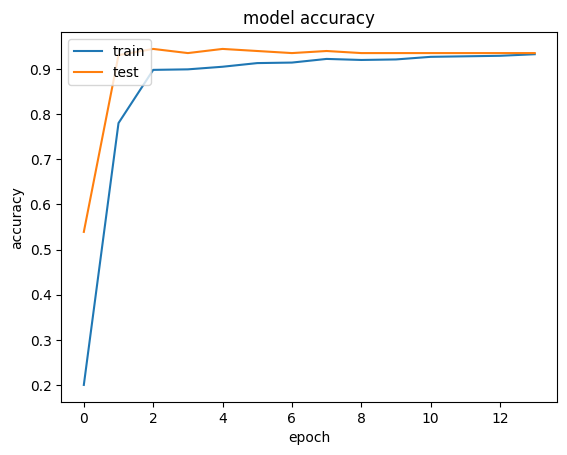

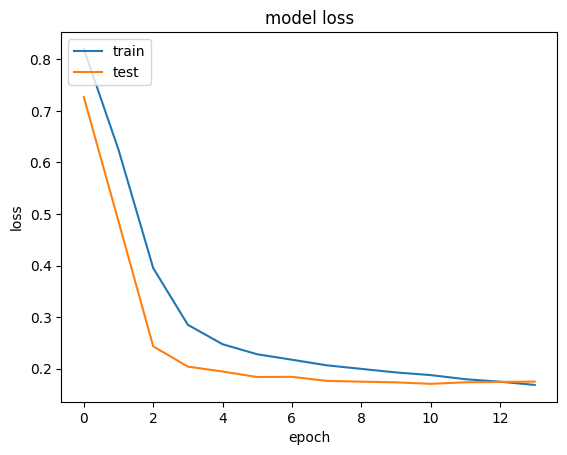

In [34]:

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

from tensorflow import convert_to_tensor as ct
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Dense,Dropout

#Creating a pipeline
model = Sequential()

#1st hidden layer with input layer
model.add(Dense(units=27,activation="relu",input_dim=29))

#2nd hidden layer
model.add(Dense(units=17,activation="relu",))

#3rd hidden layer
model.add(Dense(units=6,activation="relu",))




#output layer
model.add(Dense(units=1,activation="sigmoid"))

model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model_his=model.fit(X_train,y_train,validation_split=0.20, batch_size=17,epochs=14,verbose=1)


y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_his.history['accuracy'])
plt.plot(model_his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(model_his.history['loss'])
plt.plot(model_his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

